In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [388]:
df = pd.read_csv('C:/Users/user/Downloads/house_data.csv')

# Step 1: Dataset Exploration

In [389]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Step 2: Data Preprocessing

In [391]:
#check any missing values ---> no missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [392]:
#check any duplicated values ---> no duplicates
df.duplicated().sum()

0

In [393]:
#check for any categorical columns ---> date is categorical column ---> drop.
categorical = df.select_dtypes(include=['object']).columns

if len(categorical) > 0:
    print("there is a categorical column")
    for feature in categorical:
        print(feature)
else:
    print("there is no categorical column")

there is a categorical column
date


In [394]:
#drop date column  and also the id
df = df.drop(['date','id'], axis=1)

In [395]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

# Step 3: Exploratory Data Analysis

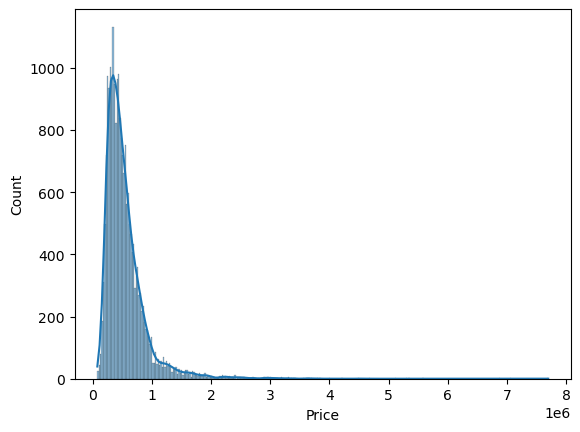

In [396]:
#visualize the distribution of the label/target (price)
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.show()

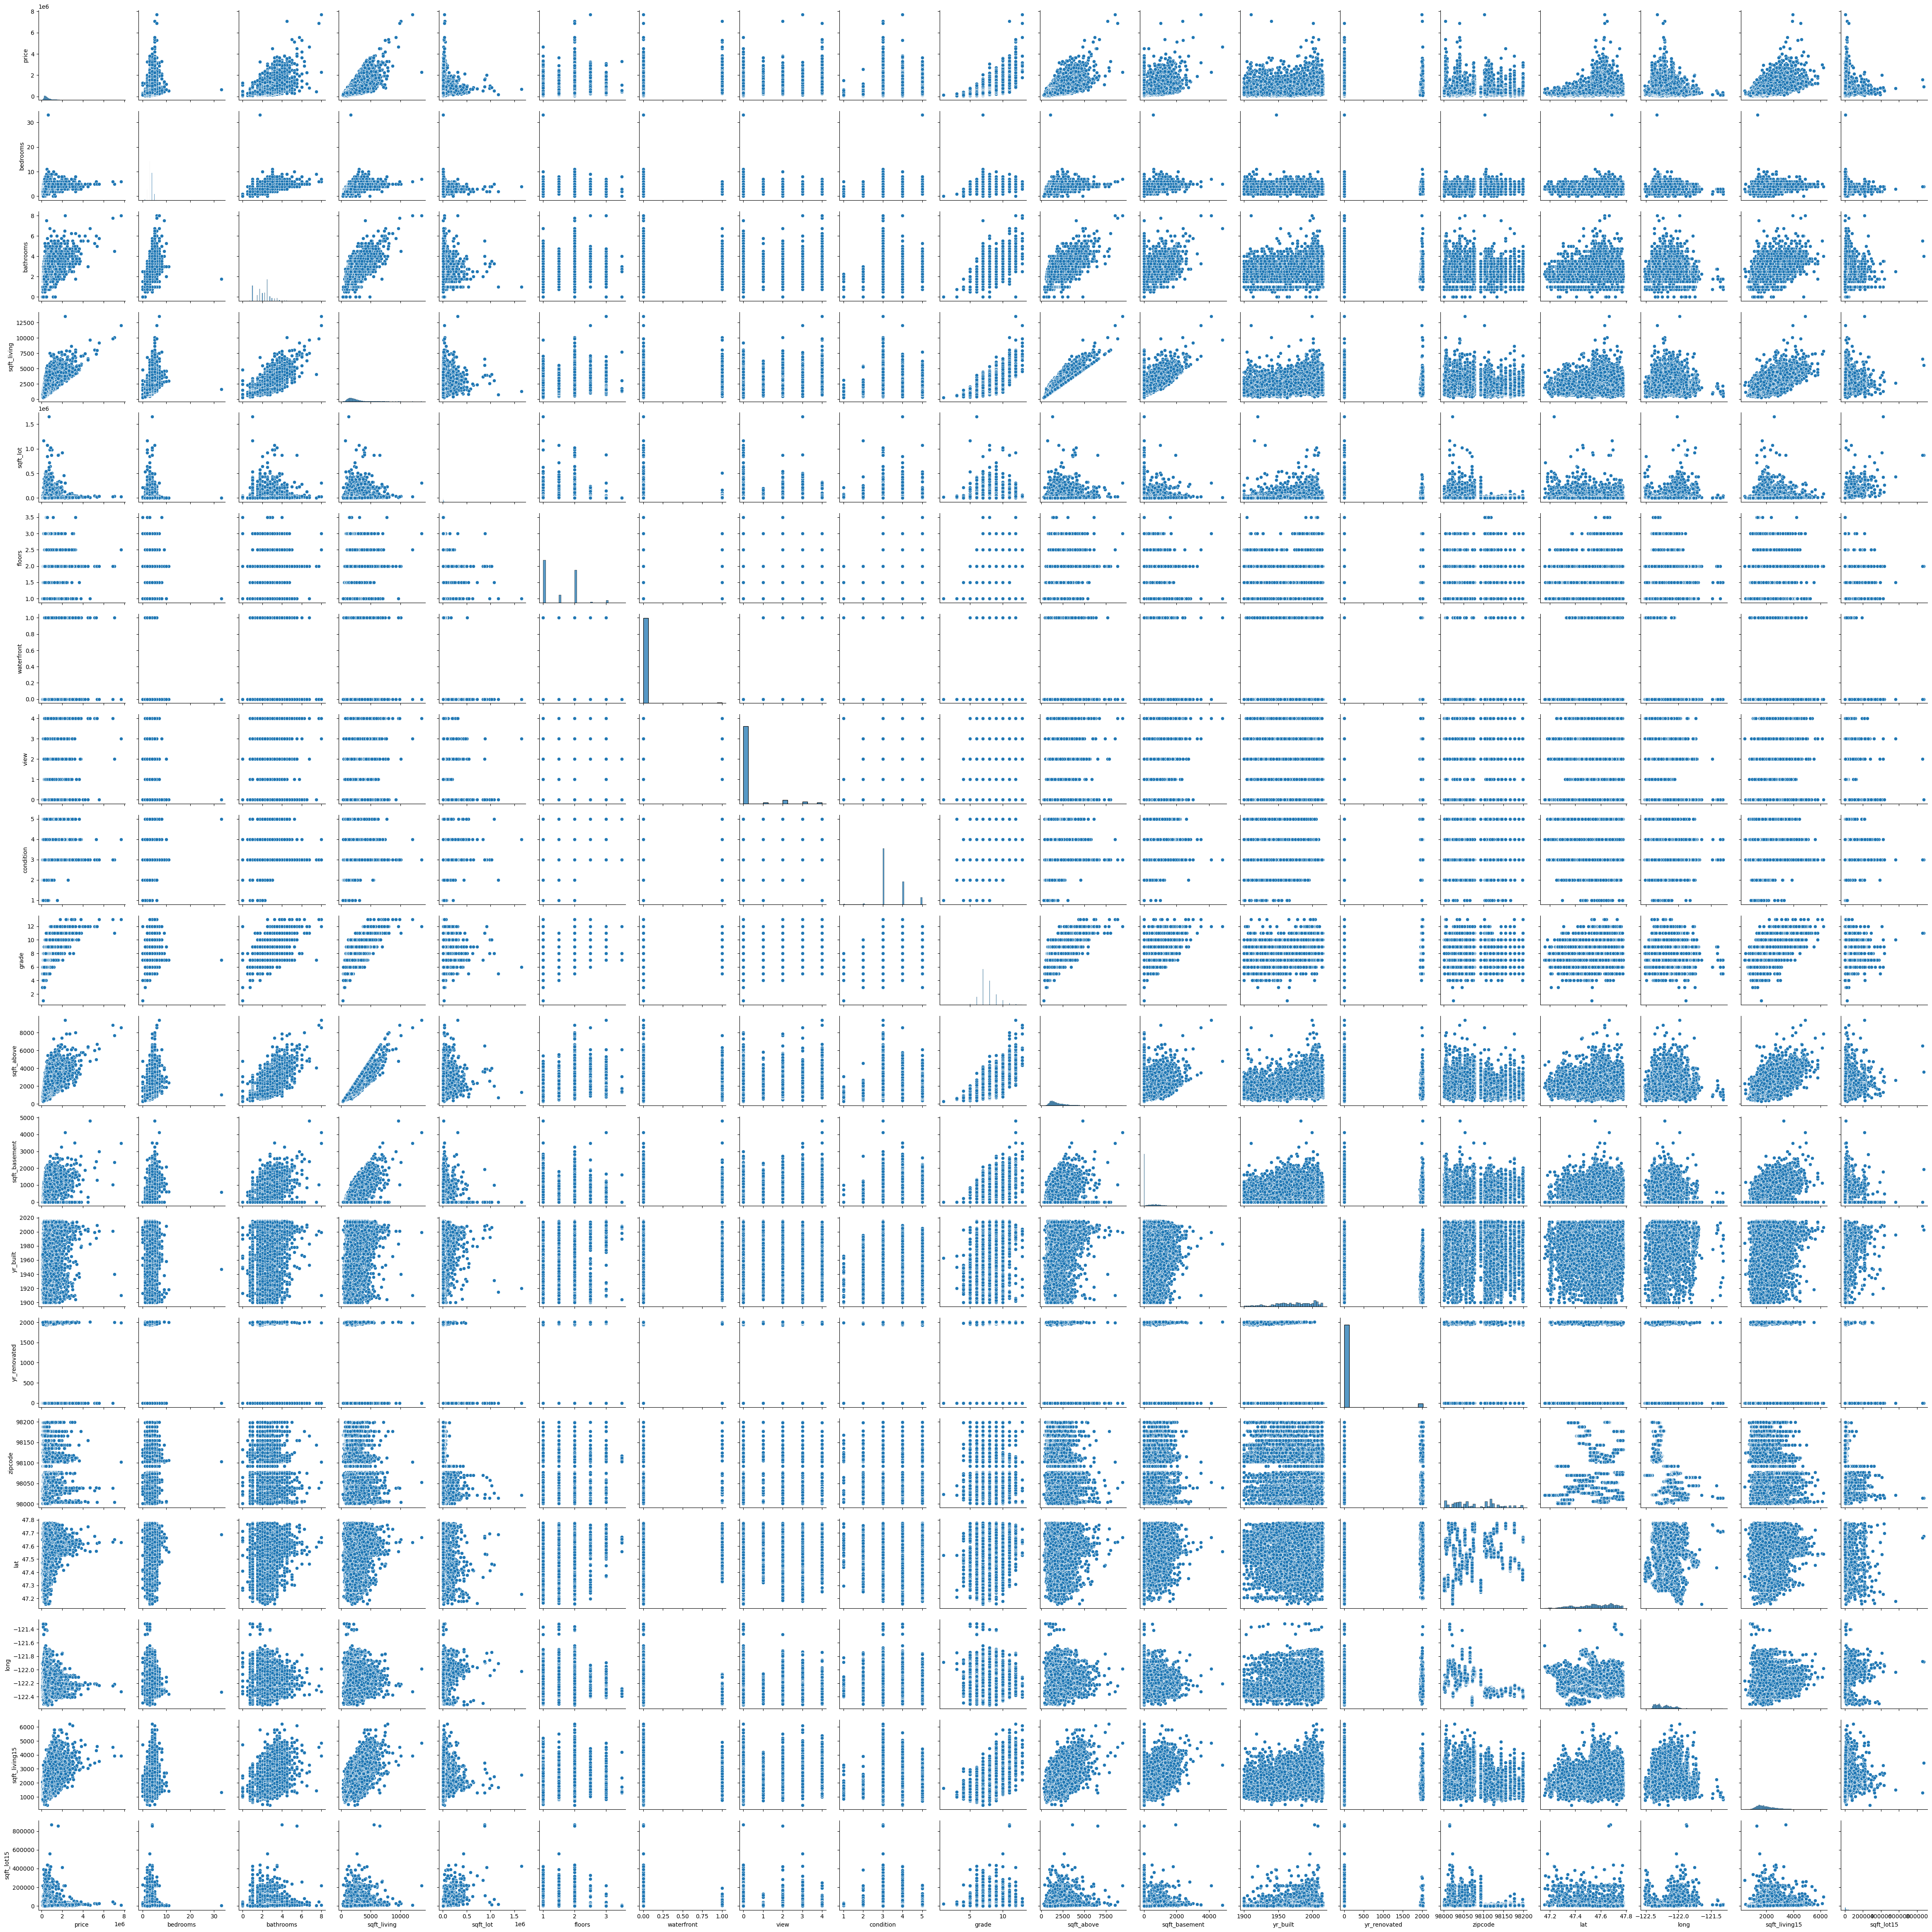

In [397]:
sns.pairplot(df)

# Step 4: Feature Scaling

# Step 5: Train-Test Split

In [398]:
#split data 
x = df.drop('price', axis = 1) 
y = df['price'] 

In [399]:
x.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [400]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [401]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , shuffle=True )

In [402]:
x_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
14665         3       1.00          870      5200     1.0           0     0   
13748         3       1.75         1750     11340     1.0           0     1   
733           3       2.00         2380     17950     2.0           0     0   
21109         2       2.25         1240       705     2.0           0     0   
12249         3       3.50         2440      3427     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
14665          5      6         870              0      1969             0   
13748          4      7        1300            450      1987             0   
733            4      8        2110            270      1934             0   
21109          3      7        1150             90      2009             0   
12249          3      7        1990            450      2000             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
14665    98042  47.3695 -122.081            870        5200  
13748    98074  47.6099 -122.058           2310       11340  
733      98155  47.7591 -122.280           2030       23900  
21109    98027  47.5321 -122.073           1240         750  
12249    98005  47.5890 -122.165           2440        2601

In [403]:
y_train.head()

14665    177000.0
13748    491300.0
733      550000.0
21109    315000.0
12249    710000.0
Name: price, dtype: float64

In [404]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290,), (4323,))

In [405]:
# its not necessary to do the scaling 
from sklearn.preprocessing import StandardScaler

features = ['sqft_lot','sqft_basement', 'sqft_lot15']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180 -0.228321     1.0           0   
1  538000.0         3       2.25         2570 -0.189885     2.0           0   
2  180000.0         2       1.00          770 -0.123298     1.0           0   
3  604000.0         4       3.00         1960 -0.244014     1.0           0   
4  510000.0         3       2.00         1680 -0.169653     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180      -0.658681      1955             0   
1     0          3      7        2170       0.245141      1951          1991   
2     0          3      6         770      -0.658681      1933             0   
3     0          5      7        1050       1.397515      1965             0   
4     0          3      8        1680      -0.658681      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340   -0.260715  
1    98125  47.7210 -122.319           1690   -0.187868  
2    98028  47.7379 -122.233           2720   -0.172375  
3    98136  47.5208 -122.393           1360   -0.284522  
4    98074  47.6168 -122.045           1800   -0.192849

# Step 6 : Linear Regression Model

# Step 7 : Model Evaluation

In [406]:
from sklearn.linear_model import LinearRegression

In [407]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [408]:
y_pred = model.predict(x_test)
y_pred

array([ 575881.43516178,  496516.41822502,  384455.6617134 , ...,
        336290.75328835,  619747.65542544, 1586323.57262337])

In [409]:
y_test.head()

5828     455000.0
9646     430000.0
14237    580000.0
3025     367000.0
12375    549900.0
Name: price, dtype: float64

In [410]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [411]:
mean_absolute_error(y_test, y_pred)

122872.65302096774

In [412]:
mean_squared_error(y_test, y_pred)

38830109152.7624

In [413]:
np.sqrt(mean_squared_error(y_test, y_pred))

197053.5692464422

In [414]:
r2_score(y_test, y_pred)

0.6971662041095097

# Step 8: Visualization

In [415]:
#Step 8: Visualization
##  The scatter plot shows the actual and predicted house prices.

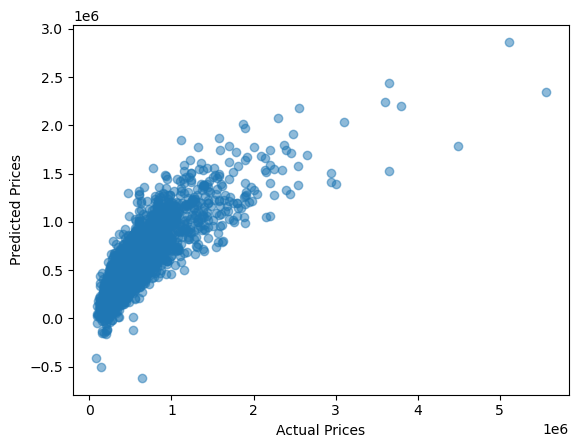

In [416]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Step 9: Conclusion

In [417]:
## The linear regression model shows performance with an r2_score value of approximately 0.7 which is not bad and not that good.

## The model could be improved by addressing potential issues such as outliers,feature selection.